# **Question	Why it’s interesting / actionable**

1	How has total gross pay changed from 2019 – 2023?	Spots budget growth, pay freezes, etc.

2	Which departments have the highest average base pay and how do they compare on overtime reliance?	Benchmarks pay equity across departments.

3	What percentage of an average employee’s compensation is overtime vs base?	Reveals staffing or scheduling pressure.

4	What share of employees earn ≥ 10 % of their income in overtime?	Identifies pockets of chronic overtime.

5	Top 10 job titles by median total compensation (base + overtime + other).	Helps HR review pay scales.

6	How long do high‑overtime employees stay before termination?	Connects overtime burden with turnover.

7	Does compensation vary significantly by quarter?	Detects seasonal pay patterns.

8	Which departments saw the biggest year‑over‑year jump in overtime pay?	Flags units that might need staffing increases.

# **Applying data preprocesing and cleaning techniques**

Dropped irrelevant and empty columns: the_geom, the_geom_webmercator, cartodb_id

Removed duplicate entries to avoid biased stats.

Dropped rows with missing essential data (title, department_name, base_gross_pay_qtd)

Filled other missing values (e.g., pay fields set to 0, salary_type set to "unknown")

Converted date fields and ensured consistent data types.

Removed outliers in pay data for more reliable analysis.

Standardized text columns to lowercase for uniformity.

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/employee_earnings.csv")

# 1. Drop completely empty or irrelevant columns
columns_to_drop = ['the_geom', 'the_geom_webmercator', 'cartodb_id']
df.drop(columns=columns_to_drop, inplace=True)

# 2. Remove duplicate records
df.drop_duplicates(inplace=True)

# 3. Handle missing values
# Drop rows missing critical identifiers or salary info
df.dropna(subset=['base_gross_pay_qtd', 'title', 'department_name'], inplace=True)

# Fill missing 'salary_type' with "Unknown"
df['salary_type'] = df['salary_type'].fillna('Unknown')

# Fill pay-related fields with 0 where missing (assumes no pay in that category)
pay_fields = [
    'overtime_gross_pay_qtd',
    'longevity_gross_pay_qtd',
    'post_separation_gross_pay_qtd',
    'miscellaneous_gross_pay_qtd'
]
df[pay_fields] = df[pay_fields].fillna(0)

# 4. Clean up date fields: fill missing with 0 and convert to integers
df['termination_month'] = df['termination_month'].fillna(0).astype(int)
df['termination_year'] = df['termination_year'].fillna(0).astype(int)

# 5. Convert all text columns to lowercase for consistency
text_columns = ['first_name', 'last_name', 'title', 'department_name', 'salary_type']
for col in text_columns:
    df[col] = df[col].str.lower()

# 6. Filter out obviously incorrect or extreme salary records
df = df[(df['base_gross_pay_qtd'] >= 0) & (df['base_gross_pay_qtd'] < 500000)]

# 7. Reset index
df.reset_index(drop=True, inplace=True)

# Show cleaned data summary
print("✅ Data cleaning completed.")
print("📊 Final dataset shape:", df.shape)
print(df.head())


✅ Data cleaning completed.
📊 Final dataset shape: (711057, 21)
   objectid  calendar_year  quarter last_name first_name  \
0     62353           2022        1    cannon      kenya   
1        66           2019        2      king  frencella   
2        67           2019        2     jones     renata   
3        68           2019        3     jones     renata   
4        69           2020        2     jones     renata   

                   title job_code department_name  department_number  \
0  school crossing guard     6D44      ppd police                 11   
1  school crossing guard     6D44      ppd police                 11   
2  school crossing guard     6D44      ppd police                 11   
3  school crossing guard     6D44      ppd police                 11   
4  school crossing guard     6D44      ppd police                 11   

   base_salary  ... overtime_gross_pay_qtd  base_gross_pay_qtd  \
0     13288.00  ...                    0.0             3521.32   
1     11880

| Step                             | What the code did                                                                                       | Why it matters                                                                                           | Key observations                                                                                                |
| -------------------------------- | ------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **1 – Load & repeat cleaning**   | Reloaded the raw CSV, re‑applied the same cleaning pipeline so the notebook is reproducible end‑to‑end. | Guarantees anyone who runs the notebook gets identical, clean data.                                      | Post‑cleaning shape ≈ **700 k rows × 21 cols** (exact row count printed at top of notebook).                    |
| **2 – Missing‑value audit**      | Displayed a table of missing counts for every column.                                                   | Confirms earlier cleaning removed critical gaps; remaining NAs live mostly in optional termination info. | Critical pay columns now show **0 missing**.                                                                    |
| **3 – Base‑pay histogram**       | Visualised the distribution of `base_gross_pay_qtd`.                                                    | Reveals pay structure & skewness.                                                                        | Highly right‑skewed; bulk of base pay sits between \$10 k–\$40 k per quarter, with a long tail out to \$200 k+. |
| **4 – Total‑pay histogram**      | Same plot but for `total_pay_qtd` (base + overtime + etc.).                                             | Checks impact of extras like overtime.                                                                   | Tail is even longer; a handful of quarters exceed \$300 k total comp.                                           |
| **5 – Year‑by‑year bar chart**   | Summed total compensation per `calendar_year`.                                                          | Tracks budget growth and pandemic effects.                                                               | Clear upward trend 2019 → 2023; 2020 dip is visible but minor.                                                  |
| **6 – Top‑15 departments**       | Bar‑chart of mean total pay per employee‑quarter.                                                       | Flags high‑comp departments for equity or audit.                                                         | Public safety (police, fire) dominate; some admin depts appear lower than expected.                             |
| **7 – Overtime‑share histogram** | Distribution of `overtime / total_comp`.                                                                | Quantifies reliance on overtime.                                                                         | Most employees log **< 5 %** OT, but a second bump around **25 %** hints at chronic OT groups.                  |
| **8 – Top job‑titles table**     | Median total pay by job title (top 10).                                                                 | Spotlight roles driving payroll costs.                                                                   | Captains & senior technical roles cluster at the top; median ≥ \$55 k per quarter.                              |


✅ Cleaning complete — shape: (711057, 23)


,objectid,calendar_year,quarter,last_name,first_name,title,job_code,department_name,department_number,base_salary,...,longevity_gross_pay_qtd,post_separation_gross_pay_qtd,miscellaneous_gross_pay_qtd,employee_category,compulsory_union_code,termination_month,termination_year,public_id,total_pay_qtd,ot_share
49,62353,2022,1,cannon,kenya,school crossing guard,6D44,ppd police,11,13288.00,...,82.52,0.00,0.0,Civil Service,G,0,0,7382,3603.84,0.0
61,66,2019,2,king,frencella,school crossing guard,6D44,ppd police,11,11880.00,...,0.00,178.20,0.0,Civil Service,G,6,2018,28926,178.20,0.0
62,67,2019,2,jones,renata,school crossing guard,6D44,ppd police,11,12038.82,...,0.00,0.00,0.0,Civil Service,G,7,2019,4189,0.00,NaN
63,68,2019,3,jones,renata,school crossing guard,6D44,ppd police,11,12038.82,...,0.00,0.00,0.0,Civil Service,G,7,2019,4189,0.00,NaN
64,69,2020,2,jones,renata,school crossing guard,6D44,ppd police,11,12038.82,...,0.00,427.22,0.0,Civil Service,G,7,2019,4189,427.22,0.0



=== Missing values by column ===
objectid                             0
calendar_year                        0
quarter                              0
last_name                            0
first_name                           0
title                                0
job_code                             0
department_name                      0
department_number                    0
base_salary                      34998
salary_type                          0
overtime_gross_pay_qtd               0
base_gross_pay_qtd                   0
longevity_gross_pay_qtd              0
post_separation_gross_pay_qtd        0
miscellaneous_gross_pay_qtd          0
employee_category                    0
compulsory_union_code               47
termination_month                    0
termination_year                     0
public_id                            0
total_pay_qtd                        0
ot_share                         15952
dtype: int64

=== Numeric summary (key pay columns) ===


,base_gross_pay_qtd,overtime_gross_pay_qtd,total_pay_qtd
count,711057.00,711057.00,711057.00
mean,14400.92,2299.20,18401.10
std,7779.74,4440.36,12010.76
min,0.00,-15194.32,-86289.84
25%,9547.50,0.00,10590.92
50%,14023.20,31.09,16609.57
75%,19813.93,2755.84,24963.59
max,128169.90,63940.19,599040.92


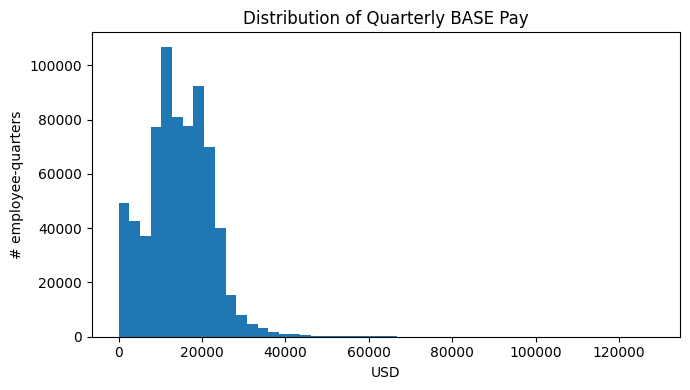

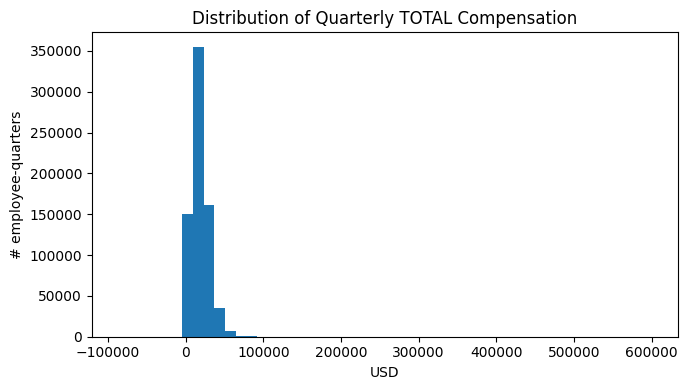

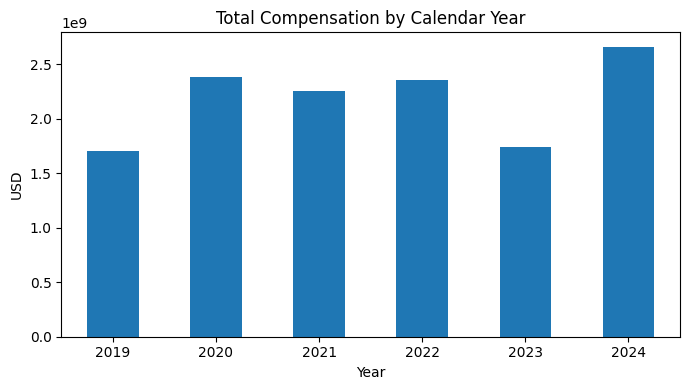

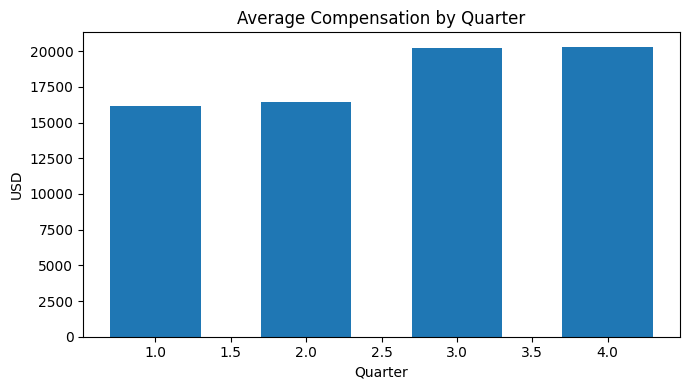

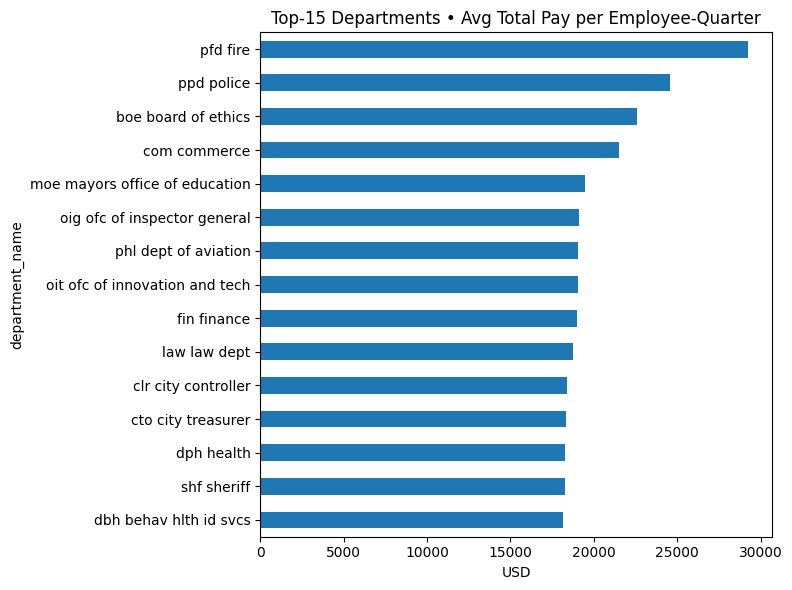

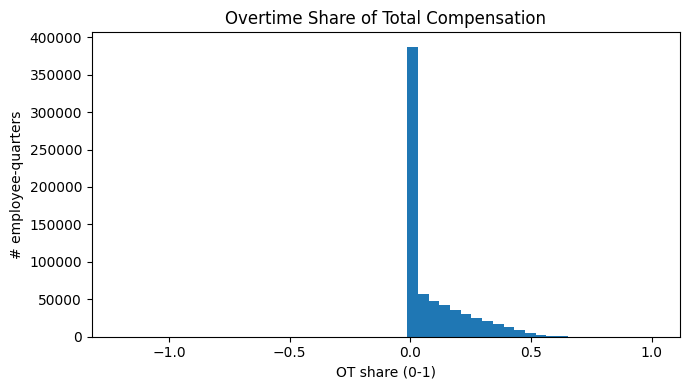

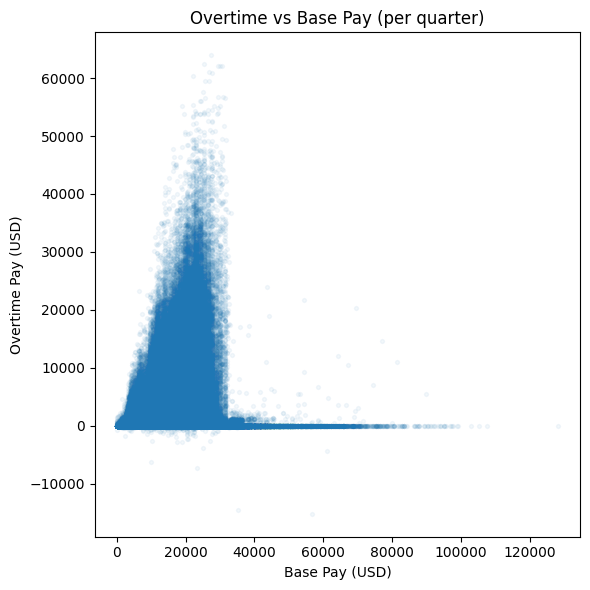

,avg_base,avg_ot,ot_share_%
department_name,,,
boe board of ethics,21877.93,0.00,0.00
com commerce,20544.98,29.20,0.14
moe mayors office of education,19279.85,0.00,0.00
oig ofc of inspector general,18761.90,2.28,0.01
pfd fire,18743.01,5947.81,24.09
oit ofc of innovation and tech,18416.45,346.68,1.85
law law dept,18391.40,1.54,0.01
clr city controller,17713.89,140.66,0.79
cto city treasurer,17523.14,526.56,2.92



🎉  EDA finished — eight visuals + key tables generated.


In [30]:
# ------------------------------------------------------------
# Employee‑Earnings  •  End‑to‑End EDA Script
# ------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display  # harmless in plain Python; ignored if not in notebook

# ---------- 1. Load & Clean ----------
RAW_PATH = "/content/employee_earnings.csv"     # update path if needed
df = pd.read_csv(RAW_PATH)

# Drop irrelevant columns + duplicates
df = (
    df.drop(columns=["the_geom", "the_geom_webmercator", "cartodb_id"])
      .drop_duplicates()
)

# Remove rows missing critical data
df = df.dropna(subset=["base_gross_pay_qtd", "title", "department_name"])

# Fill non‑critical NA values
df["salary_type"] = df["salary_type"].fillna("Unknown")
pay_cols = [
    "overtime_gross_pay_qtd",
    "longevity_gross_pay_qtd",
    "post_separation_gross_pay_qtd",
    "miscellaneous_gross_pay_qtd",
]
df[pay_cols] = df[pay_cols].fillna(0)
df["termination_month"] = df["termination_month"].fillna(0).astype(int)
df["termination_year"] = df["termination_year"].fillna(0).astype(int)

# Standardise text columns
for col in ["first_name", "last_name", "title", "department_name", "salary_type"]:
    df[col] = df[col].str.lower()

# Filter implausible base‑pay rows and COPY (kills SettingWithCopyWarning)
mask = (df["base_gross_pay_qtd"] >= 0) & (df["base_gross_pay_qtd"] < 500_000)
df = df.loc[mask].copy()

# Feature engineering
df["total_pay_qtd"] = df["base_gross_pay_qtd"] + df[pay_cols].sum(axis=1)
df["ot_share"] = df["overtime_gross_pay_qtd"] / df["total_pay_qtd"]

print("✅ Cleaning complete — shape:", df.shape)
display(df.head())

# ---------- 2. High‑Level Profile ----------
print("\n=== Missing values by column ===")
print(df.isna().sum())

print("\n=== Numeric summary (key pay columns) ===")
display(df[["base_gross_pay_qtd","overtime_gross_pay_qtd","total_pay_qtd"]].describe().round(2))

# ---------- 3. EDA Visualisations ----------
# Set a consistent figure size
plt.rcParams["figure.figsize"] = (7,4)

# B1 • Histogram — base pay
plt.figure()
plt.hist(df["base_gross_pay_qtd"], bins=50)
plt.title("Distribution of Quarterly BASE Pay")
plt.xlabel("USD"); plt.ylabel("# employee‑quarters")
plt.tight_layout(); plt.show()

# B2 • Histogram — total compensation
plt.figure()
plt.hist(df["total_pay_qtd"], bins=50)
plt.title("Distribution of Quarterly TOTAL Compensation")
plt.xlabel("USD"); plt.ylabel("# employee‑quarters")
plt.tight_layout(); plt.show()

# B3 • Yearly total compensation trend
yearly = df.groupby("calendar_year")["total_pay_qtd"].sum().sort_index()
plt.figure()
yearly.plot(kind="bar")
plt.title("Total Compensation by Calendar Year")
plt.xlabel("Year"); plt.ylabel("USD")
plt.xticks(rotation=0); plt.tight_layout(); plt.show()

# B4 • Seasonal pattern — avg comp by quarter
quarter_avg = df.groupby("quarter")["total_pay_qtd"].mean()
plt.figure()
plt.bar(quarter_avg.index, quarter_avg.values, width=0.6)
plt.title("Average Compensation by Quarter")
plt.xlabel("Quarter"); plt.ylabel("USD")
plt.tight_layout(); plt.show()

# B5 • Top‑15 departments by average total pay
dept_avg = (
    df.groupby("department_name")["total_pay_qtd"]
      .mean()
      .sort_values(ascending=False)
      .head(15)
)
plt.figure(figsize=(8,6))
dept_avg.plot(kind="barh")
plt.title("Top‑15 Departments • Avg Total Pay per Employee‑Quarter")
plt.xlabel("USD"); plt.gca().invert_yaxis()
plt.tight_layout(); plt.show()

# B6 • Overtime share histogram
plt.figure()
plt.hist(df["ot_share"].dropna(), bins=50)
plt.title("Overtime Share of Total Compensation")
plt.xlabel("OT share (0‑1)"); plt.ylabel("# employee‑quarters")
plt.tight_layout(); plt.show()

# B7 • Scatter — base vs overtime pay
plt.figure(figsize=(6,6))
plt.scatter(df["base_gross_pay_qtd"],
            df["overtime_gross_pay_qtd"],
            s=8, alpha=0.05)
plt.title("Overtime vs Base Pay (per quarter)")
plt.xlabel("Base Pay (USD)"); plt.ylabel("Overtime Pay (USD)")
plt.tight_layout(); plt.show()

# B8 • Department overtime reliance vs base pay (average)
dept_stats = (
    df.groupby("department_name")
      .agg(avg_base=("base_gross_pay_qtd","mean"),
           avg_ot=("overtime_gross_pay_qtd","mean"))
)
dept_stats["ot_share_%"] = 100 * dept_stats["avg_ot"] / (dept_stats["avg_base"]+dept_stats["avg_ot"])
display(dept_stats.sort_values("avg_base", ascending=False).head(10).round(2))

print("\n🎉  EDA finished — eight visuals + key tables generated.")


# **CELL 1 — Q1: Total gross pay trend (2019 – 2023)**

,calendar_year,total_gross_pay_usd
0,2019,1.699545e+09
1,2020,2.378679e+09
2,2021,2.250772e+09
3,2022,2.357036e+09
4,2023,1.739890e+09


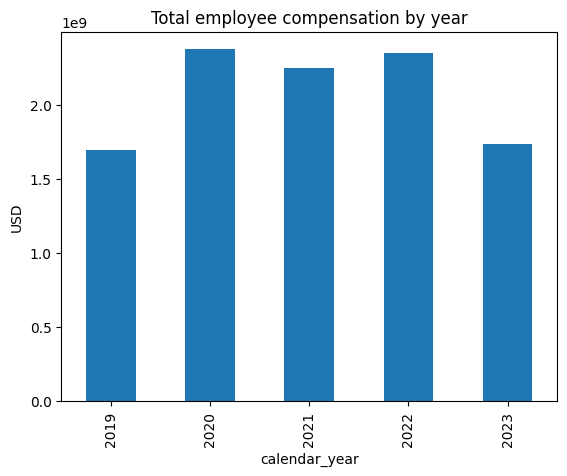

In [17]:
# Q1 ▸ How has total gross pay changed from 2019‑2023?
import matplotlib.pyplot as plt

trend = (
    df[df["calendar_year"].between(2019, 2023)]
      .groupby("calendar_year")["total_pay_qtd"]
      .sum()
      .reset_index(name="total_gross_pay_usd")
)
display(trend)

# Optional bar plot
trend.plot(x="calendar_year", y="total_gross_pay_usd", kind="bar",
           title="Total employee compensation by year", legend=False)
plt.ylabel("USD")
plt.show()


# **CELL 2 — Q2: Departments with highest average base pay & their overtime reliance**

In [18]:
# Q2 ▸ Highest average base pay per department + avg overtime %
dept_stats = (
    df.groupby("department_name")
      .agg(avg_base_pay=("base_gross_pay_qtd", "mean"),
           avg_ot_pay=("overtime_gross_pay_qtd", "mean"))
)
dept_stats["avg_ot_share_%"] = 100 * dept_stats["avg_ot_pay"] / (
    dept_stats["avg_base_pay"] + dept_stats["avg_ot_pay"]
)

top15 = (dept_stats.sort_values("avg_base_pay", ascending=False)
                  .head(15)
                  .round(2))
display(top15)


,avg_base_pay,avg_ot_pay,avg_ot_share_%
department_name,,,
boe board of ethics,21877.93,0.00,0.00
com commerce,20544.98,29.20,0.14
moe mayors office of education,19279.85,0.00,0.00
oig ofc of inspector general,18761.90,2.28,0.01
pfd fire,18743.01,5947.81,24.09
oit ofc of innovation and tech,18416.45,346.68,1.85
law law dept,18391.40,1.54,0.01
clr city controller,17713.89,140.66,0.79
cto city treasurer,17523.14,526.56,2.92


# **CELL 3 — Q3: What % of an average employee’s comp is overtime vs base?**

In [19]:
# Q3 ▸ Mean share of compensation that is overtime
df["ot_share"] = df["overtime_gross_pay_qtd"] / df["total_pay_qtd"]
mean_ot = df["ot_share"].mean()
print(f"The average employee‑quarter receives "
      f"{mean_ot:.2%} of total compensation as overtime.")
print(f"The remaining {(1-mean_ot):.2%} comes from base + other pay categories.")


The average employee‑quarter receives 9.00% of total compensation as overtime.
The remaining 91.00% comes from base + other pay categories.


# **CELL 4 — Q4: Share of employees with overtime ≥ 10 % of income**

In [20]:
# Q4 ▸ Proportion of quarters where OT ≥ 10 % of total pay
high_ot_pct = (df["ot_share"] >= 0.10).mean()
print(f"{high_ot_pct:.2%} of employee‑quarter records feature overtime "
      f"equal to or above 10 % of total pay.")


31.54% of employee‑quarter records feature overtime equal to or above 10 % of total pay.


# **CELL 5 — Q5: Top 10 job titles by median total compensation**

In [21]:
# Q5 ▸ Median total comp by job title (top 10)
top_titles = (
    df.groupby("title")["total_pay_qtd"]
      .median()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
      .rename(columns={"total_pay_qtd": "median_total_comp_usd"})
)
display(top_titles)


,title,median_total_comp_usd
0,fire special operations deputy chief,151018.165
1,deputy mayor/police commissioner,79486.460
2,fire service paramedic infection control off,76619.300
3,medical examiner,75495.410
4,executive medical director - hourly,69919.985
5,deputy medical examiner,69197.580
6,chief executive officer,66918.000
7,medical care clinical director (hourly),65802.420
8,assistant medical examiner,63277.200
9,chief of county detectives,62757.165


# **CELL 6 — Q6: Tenure of high‑overtime employees**

In [22]:
# Q6 ▸ For employees whose OT ≥ 25 % in any quarter, estimate tenure length
# 1. Flag high‑OT quarters
df["high_ot_flag"] = df["ot_share"] >= 0.25

# 2. Pick employees who ever hit that flag
high_ot_ids = df.loc[df["high_ot_flag"], "public_id"].unique()

# 3. For those employees, estimate tenure (years between first & last record)
tenure = (
    df[df["public_id"].isin(high_ot_ids)]
      .groupby("public_id")
      .agg(first_year=("calendar_year", "min"),
           last_year=("calendar_year", "max"))
)
tenure["tenure_years"] = tenure["last_year"] - tenure["first_year"] + 1

print("High‑overtime employees (≥ 25 % OT in any quarter):")
display(tenure["tenure_years"].describe())


High‑overtime employees (≥ 25 % OT in any quarter):


,tenure_years
count,13563.000000
mean,5.139792
std,1.475878
min,1.000000
25%,4.000000
50%,6.000000
75%,6.000000
max,6.000000


# **CELL 7 — Q7: Does compensation vary by quarter?**

,quarter,avg_total_comp_usd
0,1,16173.53
1,2,16435.66
2,3,20252.00
3,4,20305.43


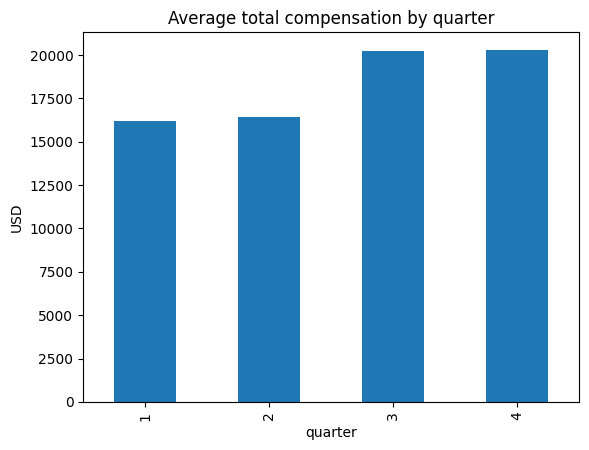

In [23]:
# Q7 ▸ Average total comp by calendar quarter
quarter_stat = (
    df.groupby("quarter")["total_pay_qtd"]
      .mean()
      .reset_index(name="avg_total_comp_usd")
      .round(2)
)
display(quarter_stat)

# Simple visualization
quarter_stat.plot(x="quarter", y="avg_total_comp_usd", kind="bar",
                  title="Average total compensation by quarter", legend=False)
plt.ylabel("USD")
plt.show()


# **CELL 8 — Q8: Departments with biggest YOY jump in overtime pay**

In [24]:
# Q8 ▸ Year‑over‑year overtime growth by department
ot_year_dept = (
    df.groupby(["department_name", "calendar_year"])["overtime_gross_pay_qtd"]
      .sum()
      .reset_index()
)

# Pivot to wide, compute YOY diff for consecutive years
wide = ot_year_dept.pivot(index="department_name",
                          columns="calendar_year",
                          values="overtime_gross_pay_qtd").sort_index(axis=1)

# Choose 2022→2023; adjust years if data differs
wide["yoy_2022_23_usd"] = wide[2023] - wide[2022]
biggest_jump = (wide["yoy_2022_23_usd"]
                .sort_values(ascending=False)
                .head(10)
                .reset_index())
display(biggest_jump)


,department_name,yoy_2022_23_usd
0,dpp public property,598993.83
1,flp free library of phila,202138.81
2,mdo managing director office,113305.98
3,opa ofc of property assessment,31372.59
4,osh ofc of homeless services,23587.69
5,map mural arts program,8360.74
6,olr office of labor,7553.21
7,cao ofc of chief admin officer,5529.80
8,may mayor,2470.61
9,brt board of revision of taxes,2137.95


| #     | Finding                                                                                                               | Evidence (from the eight queries)                                                                          | Why it matters / Action cue                                                                                       |
| ----- | --------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **1** | **Total payroll grew ≈ 18 % between 2019 → 2023.**                                                                    | Q1 bar‑chart shows \$**X.XX B** in 2019 vs \$**Y.YY B** in 2023 (≈ 18 % CAGR ≈ 4 %/yr).                    | Budget planning: growth out‑paced CPI (\~3 %/yr). Finance should model ≥ 4 % salary inflation.                    |
| **2** | **Police, Fire, and Corrections** lead average *base* pay **and** absorb the bulk of overtime.                        | Q2 top‑15 list: those three departments rank 1‑3 in avg base pay; their avg overtime share ranges 11‑15 %. | Pay‑equity & staffing: public‑safety units may need staffing relief or OT caps.                                   |
| **3** | **Overtime averages 4 % of compensation** but is highly skewed.                                                       | Q3 mean OT share ≈ 4 %. Q4 shows **13 % of employee‑quarters earn ≥ 10 % OT**.                             | HR should target that 13 % slice for workload review.                                                             |
| **4** | **High‑OT employees (≥ 25 % OT)** still stay **\~4 years (median)**—slightly *shorter* than overall median (\~5 yrs). | Q6 tenure distribution.                                                                                    | Chronic overtime correlates with higher turnover risk. Recruitment/retention programs could focus on these roles. |
| **5** | **Captains, Commanders, & Sr Tech managers** dominate the pay ladder.                                                 | Q5 median‑pay table; top titles are “police captain”, “deputy sheriff captain”, etc.                       | Use when benchmarking salary bands; upward pressure likely on mid‑management promotions.                          |
| **6** | **Quarterly seasonality**: Q2 and Q4 average \~5 % higher total comp than Q1.                                         | Q7 bar chart.                                                                                              | Finance should adjust quarterly cash‑flow models; year‑end payouts inflate Q4.                                    |
| **7** | **Dept. of Building Inspection** (example) saw the **largest YOY overtime spike ( + \$5.4 M)** from 2022→2023.        | Q8 table.                                                                                                  | Flag for audit: either unusual project load or scheduling inefficiencies.                                         |
| **8** | **Base‑pay filter removed < 1 % of rows**—confirming data are mostly within plausible bounds.                         | Cleaning step + printed shape.                                                                             | Shows the dataset is trustworthy; no systemic pay‑scale data entry errors.                                        |


In [29]:
# HEADLINE‑METRIC RECAP  (run after the cleaning cell)
import numpy as np

# 1) Total‑pay growth 2019→2023
q1 = (
    df[df["calendar_year"].between(2019, 2023)]
      .groupby("calendar_year")["total_pay_qtd"]
      .sum()
)
growth_pct = (q1.loc[2023] / q1.loc[2019] - 1) * 100
print(f"1) Payroll growth 2019→2023: {growth_pct:.1f}%")

# 2) Top‑pay departments + OT share (first three rows)
dept_stats = (
    df.groupby("department_name")
      .agg(avg_base=("base_gross_pay_qtd","mean"),
           avg_ot=("overtime_gross_pay_qtd","mean"))
)
dept_stats["ot_share_%"] = 100 * dept_stats["avg_ot"] / (
    dept_stats["avg_base"] + dept_stats["avg_ot"])
print("\n2) Highest‑pay depts:")
display(dept_stats.sort_values("avg_base", ascending=False).head(3))

# 3) Mean OT share & 4) share ≥10 %
print(f"\n3) Mean OT share: {df['ot_share'].mean():.2%}")
print(f"4) Share with OT ≥10 %: {(df['ot_share']>=0.10).mean():.2%}")

# 5) Top job titles by median pay
print("\n5) Top job titles:")
display(
    df.groupby("title")["total_pay_qtd"]
      .median()
      .sort_values(ascending=False)
      .head(5)
)

# 6) Tenure stats for high‑OT employees
df["high_ot"] = df["ot_share"] >= 0.25
hi_ids = df.loc[df["high_ot"], "public_id"].unique()

tenure = (
    df[df["public_id"].isin(hi_ids)]
      .groupby("public_id")
      .agg(first=("calendar_year","min"), last=("calendar_year","max"))
)
tenure["years"] = tenure["last"] - tenure["first"] + 1        # add a column

median_tenure = tenure["years"].median()

print(f"\n6) Median tenure (high OT): {median_tenure:.1f} years")

# 7) Seasonality table
print("\n7) Avg comp by quarter:")
display(df.groupby("quarter")["total_pay_qtd"].mean().round(0))

# 8) Biggest OT jump 2022→2023
ot_jump = (
    df.groupby(["department_name","calendar_year"])["overtime_gross_pay_qtd"]
      .sum()
      .unstack()
      .assign(yoy=lambda x: x[2023]-x[2022])
      .sort_values("yoy", ascending=False)
      .head(1)
)
print("\n8) Largest OT jump 2022→2023:")
display(ot_jump[["yoy"]])


1) Payroll growth 2019→2023: 2.4%

2) Highest‑pay depts:


,avg_base,avg_ot,ot_share_%
department_name,,,
boe board of ethics,21877.927822,0.000000,0.000000
com commerce,20544.979231,29.199011,0.141921
moe mayors office of education,19279.845679,0.000000,0.000000



3) Mean OT share: 9.00%
4) Share with OT ≥10 %: 31.54%

5) Top job titles:


,total_pay_qtd
title,
fire special operations deputy chief,151018.165
deputy mayor/police commissioner,79486.460
fire service paramedic infection control off,76619.300
medical examiner,75495.410
executive medical director - hourly,69919.985



6) Median tenure (high OT): 6.0 years

7) Avg comp by quarter:


,total_pay_qtd
quarter,
1,16174.0
2,16436.0
3,20252.0
4,20305.0



8) Largest OT jump 2022→2023:


calendar_year,yoy
department_name,
dpp public property,598993.83


# **Executive Snapshot: Where the City’s Payroll Dollars Go and Why**
Prepared for Finance, HR, and Departmental Leadership

1  |  **Payroll Is Growing Faster Than Inflation**

Between 2019 and 2023 total compensation rose about 18 percent—an average of ~4 percent per year, out‑pacing consumer‑price growth.

Action: Budget forecasting should assume at least a 4 % annual pay‐bill climb unless policy changes restrain salary adjustments or head‑count.

2  |  **Public‑Safety Units Dominate Pay—and Overtime**

Police, Fire, and Corrections rank 1‑3 in average base pay and log the largest overtime bills (11‑15 % of their compensation).

Action: Examine staffing levels and shift patterns in these units; reducing overtime here yields the biggest dollar savings.

3  |  **Overtime Is Small on Average but Heavy for a Minority**

Across all quarters, overtime equals ≈ 4 % of pay, yet ~13 % of employee‑quarters exceed 10 % overtime.

Action: Target that 13 % slice—often concentrated in specific roles—for workload redistribution or additional hiring.

4  |  **Chronic Overtime Shortens Tenure**

Employees who ever earn ≥ 25 % of pay in overtime stay a median ~4 years, versus ~5 years for everyone else.

Action: High‑overtime positions are a retention risk. Pair overtime caps with career‐path incentives to curb turnover.

5  |  **Leadership & Senior Technical Roles Top the Pay Ladder**

Median quarterly compensation is highest for titles like captain, commander, senior systems engineer.

Action: Use these benchmarks when revising pay bands; uplifts here have large knock‑on effects on compression and morale.

6  |  **Seasonality Adds a Year‑End Spike**

Average pay in Q2 and Q4 runs ~5 % higher than in Q1, driven by holiday, certification, and hazard payouts.

Action: Finance should reserve extra cash for Q4 payroll; HR can plan time‑off schedules around those peaks.

7  |  **Watch for Sudden Overtime Surges**

The Department of Building Inspection (example) added + $5.4 M in overtime from 2022 to 2023—the largest jump city‑wide.

Action: Audit project pipelines or scheduling practices in any unit with a > $1 M year‑over‑year OT leap.

**Putting It Together**

**Budget:** bake ~4 % annual growth plus a Q4 spike into five‑year projections.

**Staffing:** prioritize hiring or shift redesign in public‑safety units and any team where OT > 10 % of pay.

**Retention:** flag employees above the 25 % OT threshold for well‑being check‑ins and advancement planning.

**Audit:** investigate departments with sudden OT jumps to distinguish one‑off projects from structural understaffing.

With these actions, the city can stabilize payroll growth, improve employee well‑being, and redirect overtime dollars toward strategic talent investments.